# Support Vector Machines - Explaining Hyper Parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")
# Data farelerin üzerinden elde edilen verileri içermektedir

In [3]:
df.head()
# 0: Virus not present  Virüs mevcut değil
# 1: Virus present      Virüs mevcut

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info() #Tamamen temiz bir veri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Separating Hyperplane Manually

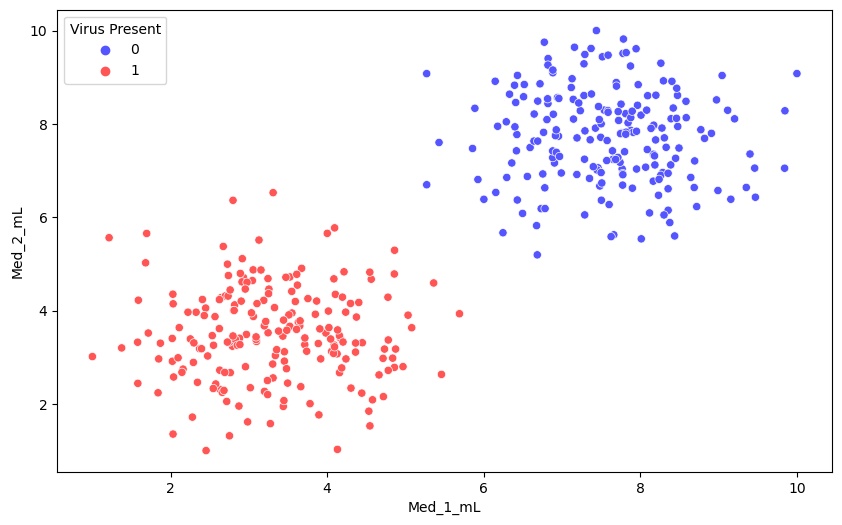

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic');
# İki boyutlu bir data virüs olup olmadığına bakıyoruz
# bu datayı lineer olarak ayırabiliriz

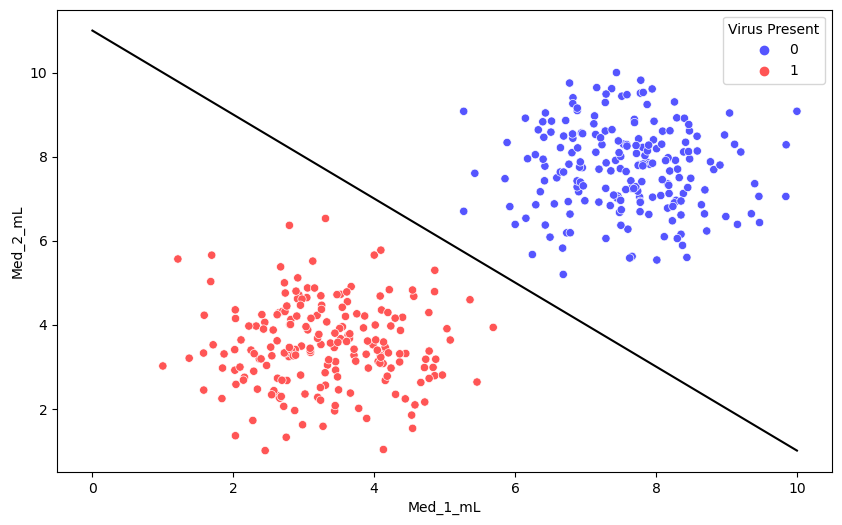

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1  # doğrıumuzun eğilimi
b = 11
y = m*x + b
plt.plot(x,y,'black');
# 0 dan 10 a kadar 100 farklı değer için bir linner çiziyoruz
# Datamızı noktalara göre eşit şekilde ayırdı

## SVM - Support Vector Machine  (Destek Vektör Makinesi)

In [7]:
from sklearn.svm import SVC  # kitaplığımızı indiriyoruz

In [8]:
help(SVC)
# C parametresi ne kadar büyükse hard margen(kenar) ne kadar küçükse soft margen oluyor
# En önemli parametremiz C parametresi :kayan nokta, varsayılan=1.0 | Düzenleme parametresi. Düzenlileştirmenin gücü | C ile ters orantılı. Kesinlikle pozitif olmalıdır.
# Penaltı | bir kare l2 cezasıdır.
# Kernelparametressi: Algoritmada kullanılacak çekirdek türünü belirtir. | Hiçbiri verilmezse, 'rbf' kullanılacaktır. Bir çağrılabilir verilirse | veri matrislerinden çekirdek matrisini önceden hesaplamak için
# kullanılır; bu matris | ``(n_samples, n_samples) şeklinde bir dizi olmalıdır

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**
- **NOT: Bu örnek için, algoritmayı keşfedeceğiz, bu nedenle şimdilik herhangi bir ölçeklendirmeyi ve hatta bir tren\test ayrımını atlayacağız.**

In [9]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1)

In [25]:
model = SVC(kernel='linear', C=0.1)  # C= marjinin ayarlanamsını yapmaktadır 1 yaparsak margin azalır
# Sadece hyper parametre ile eğiteceğimiz için bütün parametreyi eğittik
model.fit(X, y) # yoksa bundan sonrakileri train ve test olarak ayıracağız

SVC(C=0.1, kernel='linear')

In [11]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary
# py dosyasının yaptığı iş aşağıdaki görseli oluştut-ruyoer verileri girince

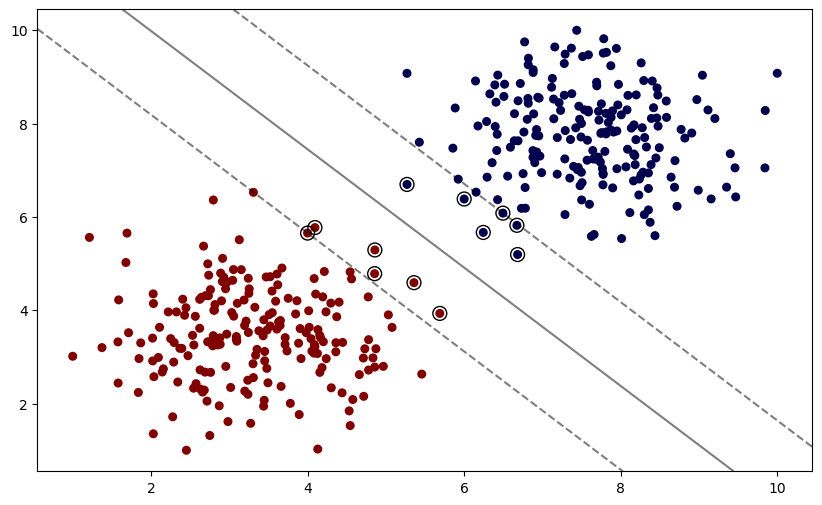

In [12]:
plot_svm_boundary(model,X,y) # X ve y yukarıda eğitilen veriler

## Hyper Parameters

### C

Düzenleme parametresi. Düzenlileştirmenin gücü C ile **ters** orantılıdır. Kesinlikle pozitif olmalıdır. Ceza bir kare l2 cezasıdır.

*Not: Denklemleri takip ediyorsanız, özellikle ISLR'de açıklanan C değeri, scikit-learn'deki C değeri bu değerle **ters** orantılıdır.*

In [13]:
model = SVC(kernel='linear', C=1)  # try different C values
model.fit(X, y)

SVC(C=1, kernel='linear')

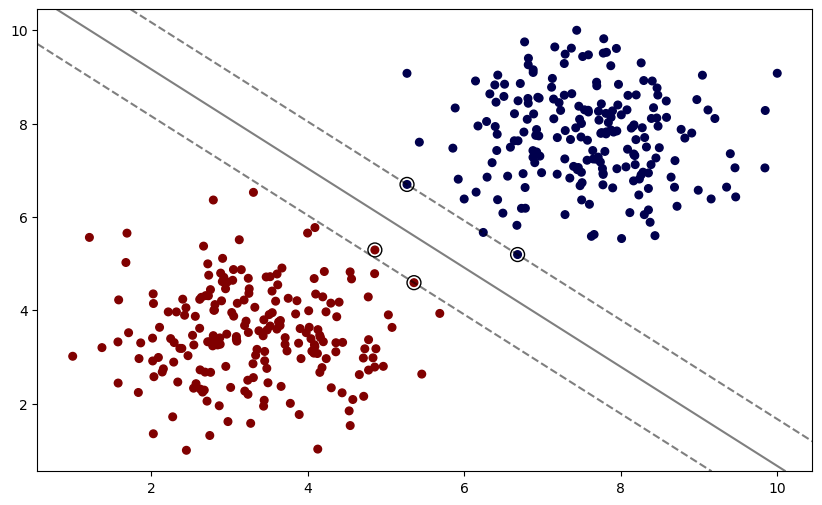

In [14]:
plot_svm_boundary(model,X,y)

### Kernel

Çekirdek İşlevi, verileri girdi olarak almak ve gerekli veri işleme biçimine dönüştürmek için kullanılan bir yöntemdir. Support Vector Machine'de kullanılan bir dizi matematiksel işlev nedeniyle “Kernel” kullanılır, verileri işlemek için pencere sağlar. Bu nedenle, Çekirdek İşlevi genellikle eğitim veri setini, doğrusal olmayan bir karar yüzeyinin daha yüksek sayıda boyut uzayında doğrusal bir denkleme dönüştürülebilmesi için dönüştürür. Temel olarak, standart bir özellik boyutunda iki nokta arasındaki iç çarpımı döndürür.

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


Bir SVM'yi Radial Basis Function (RBF) çekirdeği ile eğitirken, iki parametre dikkate alınmalıdır: C ve gama. Tüm SVM çekirdeklerinde ortak olan C parametresi, eğitim örneklerinin yanlış sınıflandırılmasını karar yüzeyinin basitliğine karşı değiştirir. Düşük bir C, karar yüzeyini pürüzsüz hale getirirken, yüksek bir C, tüm eğitim örneklerini doğru bir şekilde sınıflandırmayı amaçlar. gama, tek bir eğitim örneğinin ne kadar etkiye sahip olduğunu tanımlar. Gama ne kadar büyükse, diğer örneklerin etkilenmesi için o kadar yakın olması gerekir.

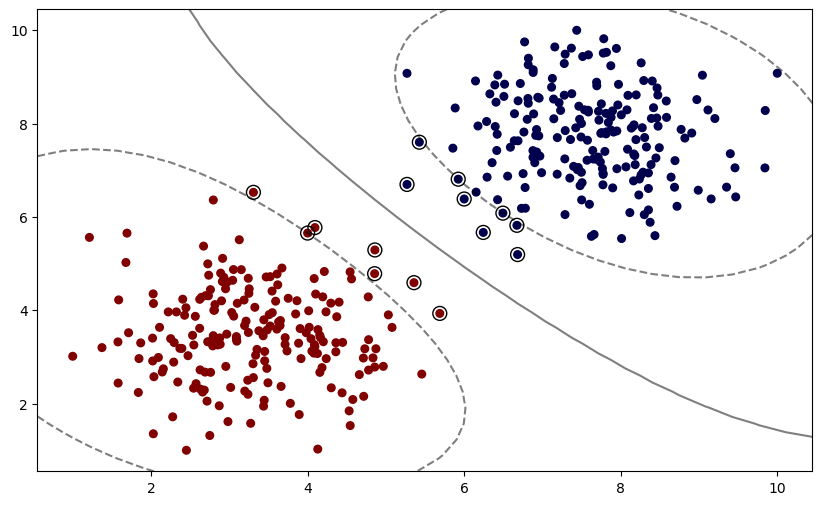

In [31]:
model = SVC(kernel='rbf', C=1, gamma=0.05)  # Gama büyüdükçe dafa hard bölgeler oluşur
model.fit(X, y)
plot_svm_boundary(model,X,y)
# Datalarda lineer fonksiyon ile ayıramıyorsam karnel kullanılır

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

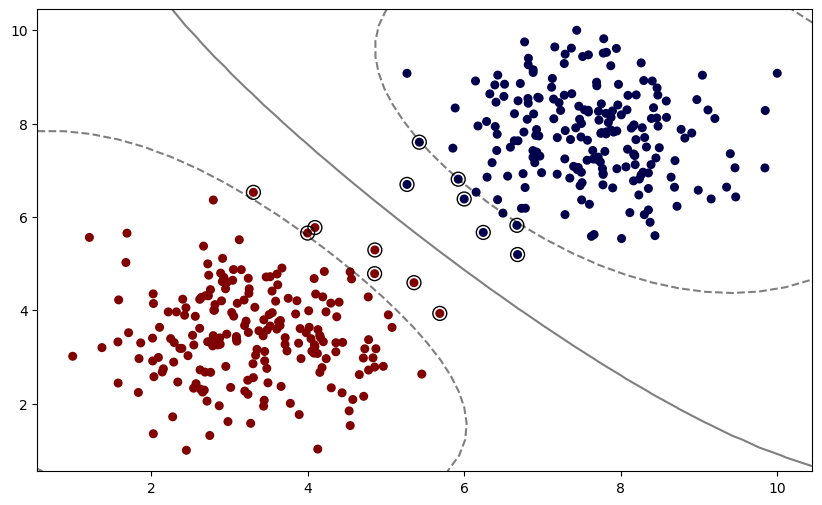

In [16]:
model = SVC(kernel='rbf', C=1, gamma=0.04)
model.fit(X, y)
plot_svm_boundary(model,X,y)

Sigmoid çekirdeği, sinir ağlarından kaynaklandığı için destek vektör makineleri için oldukça popülerdi. Çekirdek matrisinin pozitif yarı kesin (PSD) olmayabileceği bilinmesine rağmen, diğer özellikler tam olarak çalışılmamıştır. Bu yazıda, bu tür PSD olmayan çekirdekleri ayrılabilirlik bakış açısıyla tartışıyoruz. Sonuçlar, PSD olmayan çekirdeklerin olası kullanımının doğrulanmasına yardımcı olur. Bir örnek, sigmoid çekirdek matrisinin belirli parametrelerde koşullu olarak pozitif tanımlı (CPD) olduğunu ve dolayısıyla orada geçerli çekirdekler olduğunu gösterir. Bununla birlikte, sigmoid çekirdeğin genel olarak RBF çekirdeğinden daha iyi olmadığını da açıklıyoruz.

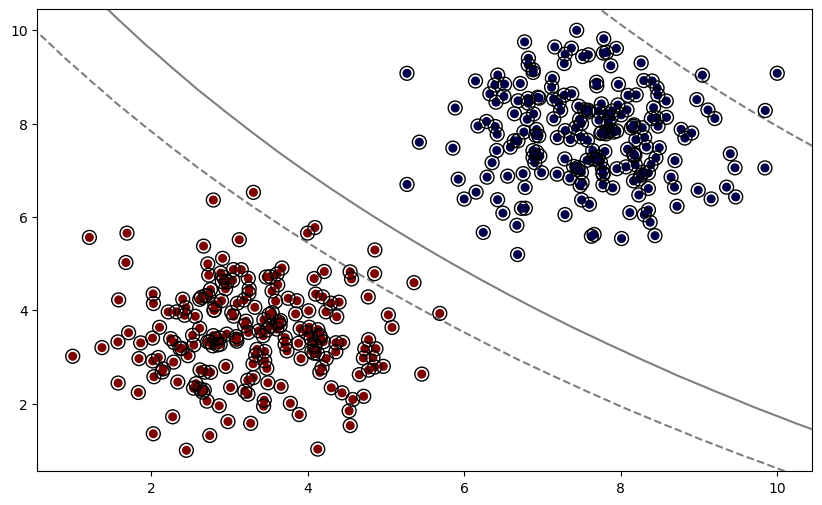

In [17]:
model = SVC(kernel='sigmoid') # aşağıda gözüktüğü gibi sigmoid bu datada kullanılmak için uygun değildir
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)  === Derece (yalnızca çoklu çekirdekler)

Polinom çekirdek fonksiyonunun derecesi ('poly'). Diğer tüm çekirdekler tarafından yok sayılır.

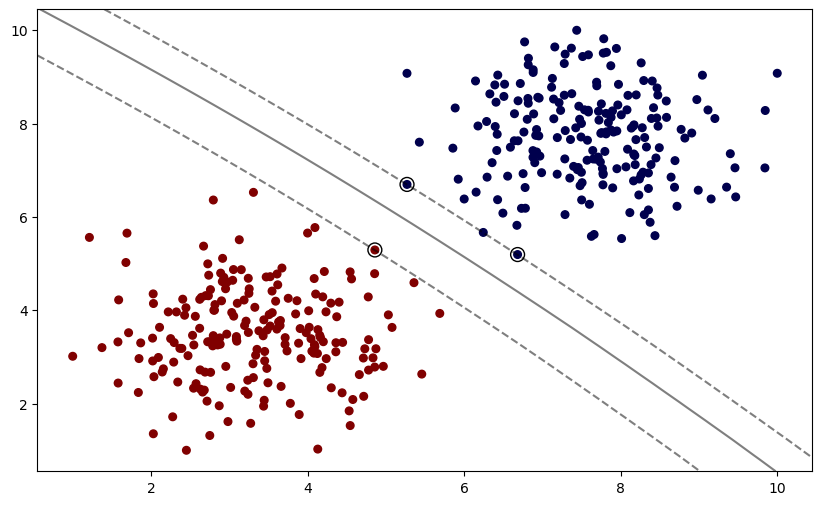

In [18]:
model = SVC(kernel='poly', C=0.01, degree=5) # try different degrees
model.fit(X, y)
plot_svm_boundary(model,X,y)

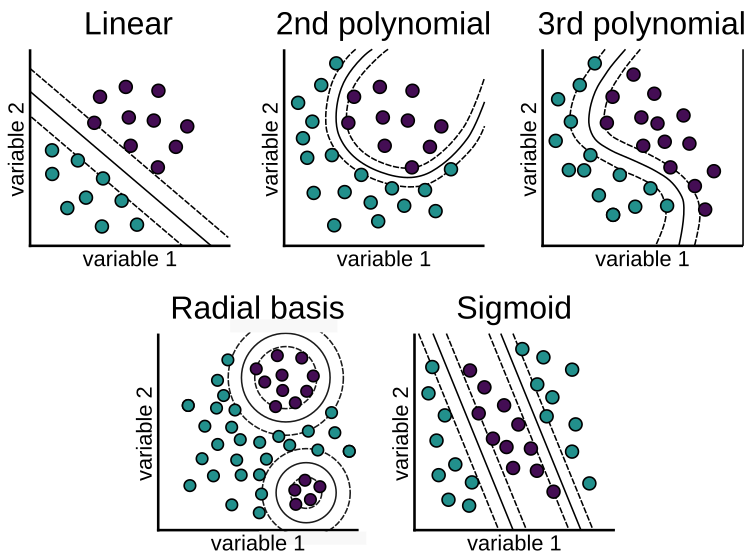

## Grid Search

Unutmayın, bu basit örnek için, sınıfların kolayca ayrıldığını gördük, bu da modelin her bir varyasyonunun kolayca %100 doğruluk elde edebileceği anlamına gelir, bu da ızgara aramanın "yararsız" olduğu anlamına gelir.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[2,3]}
grid = GridSearchCV(svm,param_grid)

In [21]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [22]:
grid.best_score_  # Bütün gözlem içerisinde verilerin ayrıldığını gösterir

1.0

In [23]:
grid.best_params_ # en iyi parametleri vermektedir

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [24]:
grid.best_estimator_

SVC(C=0.01, degree=2, kernel='linear')

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.